In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import mglearn
%matplotlib inline 

# Linear Regression ( 61) 

Tuning Parameters: 
	• Alpha: 
		○ How much importance the model places on simplicity vs training set performance 
		○ Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help with generalization 
		
Generalization: 
	• Increase alpha - more like lasso - less complexity - better generalization - less overfitting - less performance on training data
Decrease alpha - more like linear regression - more complexity - less generalization - more overfitting - better performance on training data 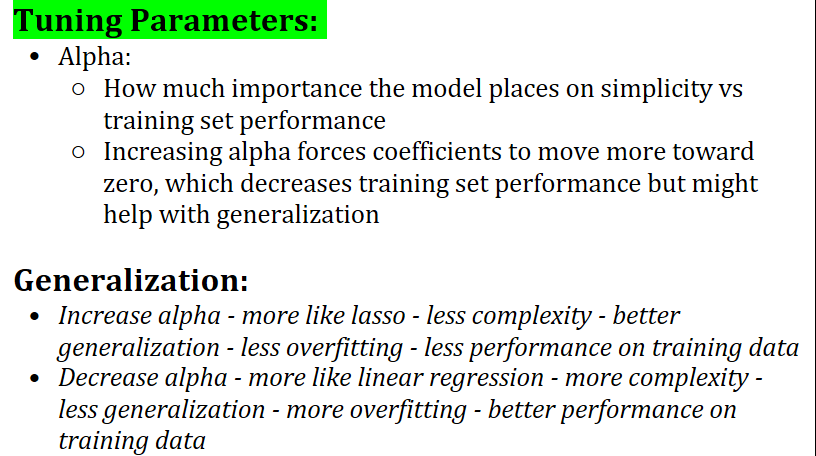

## Make Wave Dataset

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Data: An example of a synthetic two-class classification dataset. which has two features.
X, y = mglearn.datasets.make_wave(n_samples=60) 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

### Coefficient and Intercept

In [3]:
print('Coefficient: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficient:  [0.39390555]
Intercept:  -0.031804343026759746


### Training and Testing Score

In [4]:
print('Training Set Score: ', lr.score(X_train, y_train))
print('Testing Set Score: ', lr.score(X_test, y_test))

Training Set Score:  0.6700890315075756
Testing Set Score:  0.65933685968637


## Boston Dataset

In [7]:
X, y = mglearn.datasets.load_extended_boston() #extended boston dataset includes interaction terms in features

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
lr = LinearRegression().fit(X_train, y_train) 

Notice significant overfitting with the discrepancy between training and testing score 

In [8]:
print('Training Set Score: ', lr.score(X_train, y_train))
print('Testing Set Score: ', lr.score(X_test, y_test))

Training Set Score:  0.9520519609032729
Testing Set Score:  0.607472195966589


# Ridge Regresson (L2 Reguralization) 

Tuning Parameters: 
	• Alpha: 
		○ How much importance the model places on simplicity vs training set performance 
		○ Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help with generalization 
		
Generalization: 
	• Increase alpha - more like lasso - less complexity - better generalization - less overfitting - less performance on training data
Decrease alpha - more like linear regression - more complexity - less generalization - more overfitting - better performance on training data 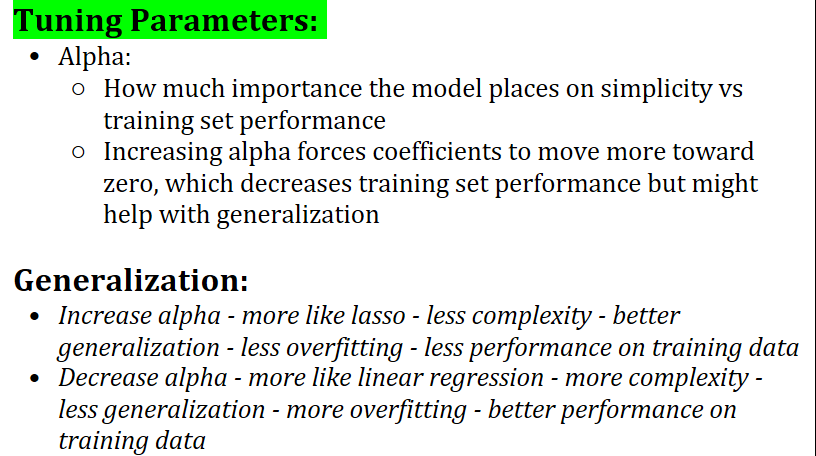

In [10]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train) #default alpha = 1

print('Training Set Score: ', ridge.score(X_train, y_train))
print('Testing Set Score: ', ridge.score(X_test, y_test))

Training Set Score:  0.885796658517094
Testing Set Score:  0.7527683481744755


Increasing alpha to 10 = increasing the effect of reguralization, less complexity, less overfitting, more generalization

In [14]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print('Training Set Score: ', ridge10.score(X_train, y_train))
print('Testing Set Score: ', ridge10.score(X_test, y_test))

Training Set Score:  0.7882787115369614
Testing Set Score:  0.6359411489177311


Decreasing alpha = opposite effects, decreasing the effect of reguralization (more like linear regression), more complexity, more overfitting, less generalization

In [15]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print('Training Set Score: ', ridge01.score(X_train, y_train))
print('Testing Set Score: ', ridge01.score(X_test, y_test))

Training Set Score:  0.9282273685001988
Testing Set Score:  0.7722067936479806


### Visualizing the Coefficients in the Different Models 

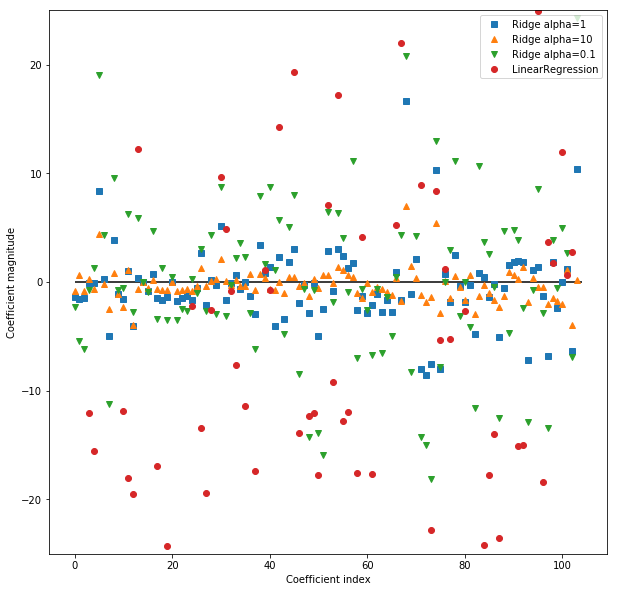

In [20]:
plt.figure(figsize= (10,10))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1") 
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression") 
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_)) 
plt.ylim(-25, 25)
plt.legend(loc = 'upper right');

# Lasso Regresson (L1 Reguralization) 

Tuning Parameters: 
	• Alpha: 
		○ Lower alpha : more complex model 
		○ Higher alpha : simpler model, coefficients are smaller, some are set to 0
		
Generalization: 
	• Increase alpha - more like lasso - less complexity - better generalization - less overfitting - less performance on training data
Decrease alpha - more like linear regression - more complexity - less generalization - more overfitting - better performance on training data 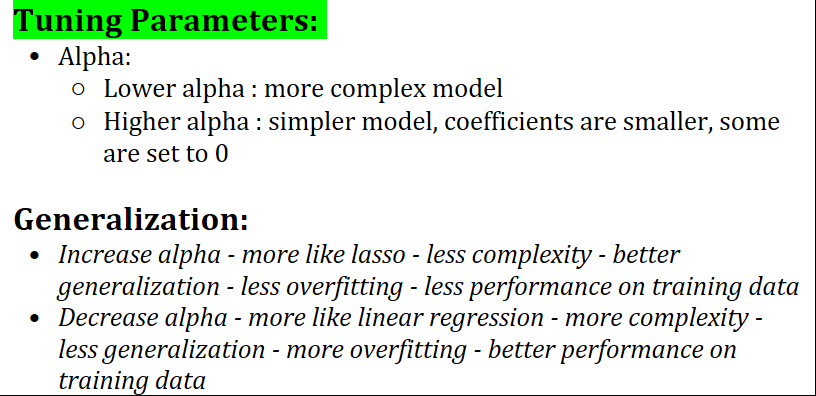

In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train) 
print('Training Set Score: ', lasso.score(X_train, y_train))
print('Testing Set Score: ', lasso.score(X_test, y_test))
print("Number of features used: ", np.sum(lasso.coef_ != 0))

Training Set Score:  0.29323768991114607
Testing Set Score:  0.20937503255272294
Number of features used:  4


Above you can see with the default parameter of alpha = 1, we are underfitting the data (does bad on both training and testing). Decreasing Alpha will help

In [24]:
# we increase the default setting of "max_iter", 
# otherwise the model would warn us that we should increase max_iter.

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
print('Training Set Score: ', lasso001.score(X_train, y_train))
print('Testing Set Score: ', lasso001.score(X_test, y_test))
print("Number of features used: ", np.sum(lasso001.coef_ != 0))

Training Set Score:  0.8962226511086497
Testing Set Score:  0.7656571174549983
Number of features used:  33


Setting the alpha too low - removes reguralization effects, model is not similar to linear regression 

In [31]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) 
print('Training Set Score: ', lasso00001.score(X_train, y_train))
print('Testing Set Score: ', lasso00001.score(X_test, y_test))
print("Number of features used: ", np.sum(lasso00001.coef_ != 0))

Training Set Score:  0.9507158754515467
Testing Set Score:  0.6437467421272709
Number of features used:  96


### Visualizing the Coefficients in the Different Models 

Text(0, 0.5, 'Coefficient magnitude')

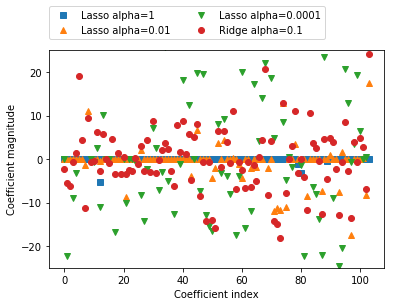

In [32]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01") 
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1") 
plt.legend(ncol=2, loc=(0, 1.05)) 
plt.ylim(-25, 25) 
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")